In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df1 = pd.read_csv('../Data/data_educacion_c.csv')
df2 = pd.read_csv('../Data/data_esperanza_vida_c.csv')
df3 = pd.read_csv('../Data/data_gasto_salud_c.csv')
df4 = pd.read_csv('../Data/data_inflacion_c.csv')
df5 = pd.read_csv('../Data_preparada/data_conca1.csv')

In [34]:
df5.rename(columns={'país Name': 'país'}, inplace=True)

In [35]:
df_concat = pd.concat([df1,df2,df3,df4,df5])

In [36]:
df_concat.sort_values('país', inplace=True)

In [37]:
df_concat.to_csv('../Data/merge_data.csv', index=False)

In [38]:
df = pd.read_csv('../Data/merge_data.csv')

In [39]:
df

país                                     factor_(serie)   Año  \
0      Afganistán  Nivel de instrucción, al menos ciclo inferior ...  1987   
1      Afganistán                                    Población rural  1997   
2      Afganistán                                    Población rural  1996   
3      Afganistán                                    Población rural  1995   
4      Afganistán                                    Población rural  1994   
...           ...                                                ...   ...   
48199   Venezuela  Nivel de instrucción, al menos ciclo superior ...  2011   
48200   Venezuela  Nivel de instrucción, al menos escuela de nive...  2011   
48201   Venezuela  Tasa de finalización del ciclo inferior de la ...  2011   
48202   Venezuela  Gasto nacional en salud del gobierno general p...  2001   
48203   Venezuela                                   Población, total  2022   

              Valor  
0      1.336687e+01  
1      1.390997e+07  
2      1.339207e+07  
3      1.286849e+07  
4      1.212736e+07  
...             ...  
48199  4.694000e+01  
48200  2.486440e+01  
48201  7.618580e+01  
48202  1.742315e+02  
48203  2.830170e+07  

[48204 rows x 4 columns]

In [40]:
df.dtypes

país               object
factor_(serie)     object
Año                 int64
Valor             float64
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   país            48204 non-null  object 
 1   factor_(serie)  48204 non-null  object 
 2   Año             48204 non-null  int64  
 3   Valor           48204 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


In [42]:
# Aplicar la función pivot
df_pivoted = df.pivot_table(index=['país','Año'], columns='factor_(serie)', values='Valor').reset_index()
df_pivoted

factor_(serie)        país   Año  Crecimiento de la población (% anual)  \
0               Afganistán  1987                              -1.210190   
1               Afganistán  1988                               0.586318   
2               Afganistán  1989                               2.751877   
3               Afganistán  1990                               0.202434   
4               Afganistán  1991                               0.469880   
...                    ...   ...                                    ...   
1579             Venezuela  2018                              -2.443543   
1580             Venezuela  2019                              -2.904996   
1581             Venezuela  2020                              -1.674986   
1582             Venezuela  2021                              -1.025179   
1583             Venezuela  2022                               0.360447   

factor_(serie)  Crecimiento de la población rural (% anual)  \
0                                                 -2.043746   
1                                                 -0.275758   
2                                                  2.637888   
3                                                  0.089590   
4                                                  0.356909   
...                                                     ...   
1579                                              -2.655330   
1580                                              -3.176733   
1581                                              -2.007172   
1582                                              -1.418423   
1583                                              -0.094537   

factor_(serie)  Crecimiento de la población urbana (% anual)  \
0                                                   2.128391   
1                                                   3.898014   
2                                                   3.179585   
3                                                   0.623574   
4                                                   0.889255   
...                                                      ...   
1579                                               -2.415197   
1580                                               -2.868725   
1581                                               -1.630797   
1582                                               -0.973083   
1583                                                0.420433   

factor_(serie)  Crecimiento del PIB per cápita (% anual)  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
1579                                                 NaN   
1580                                                 NaN   
1581                                                 NaN   
1582                                                 NaN   
1583                                                 NaN   

factor_(serie)  Esperanza de vida al nacer, mujeres (años)  \
0                                                43.453000   
1                                                46.569000   
2                                                47.610000   
3                                                48.397000   
4                                                49.144000   
...                                                    ...   
1579                                             76.431000   
1580                                             76.566000   
1581                                             75.814000   
1582                                             75.207000   
1583                                             75.835743   

factor_(serie)  Esperanza de vida al nacer, total (años)  \
0                                              

In [43]:
df_pivoted.isna().sum()

factor_(serie)
país                                                                                                                                          0
Año                                                                                                                                           0
Crecimiento de la población (% anual)                                                                                                         0
Crecimiento de la población rural (% anual)                                                                                                   0
Crecimiento de la población urbana (% anual)                                                                                                  0
Crecimiento del PIB per cápita (% anual)                                                                                                    180
Esperanza de vida al nacer, mujeres (años)                                                                               

In [44]:
# Agrupar por la columna 'factor_(serie)' y calcular estadísticas resumidas
grouped = df.groupby('factor_(serie)').describe()
grouped


Año                     \
                                                     count    mean        std   
factor_(serie)                                                                  
Crecimiento de la población (% anual)               1584.0  2004.5  10.391575   
Crecimiento de la población rural (% anual)         1584.0  2004.5  10.391575   
Crecimiento de la población urbana (% anual)        1584.0  2004.5  10.391575   
Crecimiento del PIB per cápita (% anual)            1404.0  2004.5  10.391996   
Esperanza de vida al nacer, mujeres (años)          1584.0  2004.5  10.391575   
Esperanza de vida al nacer, total (años)            1584.0  2004.5  10.391575   
Esperanza de vida al nacer, varones (años)          1584.0  2004.5  10.391575   
Gasto de bolsillo per cápita (US$ actuales)         1584.0  2004.5  10.391575   
Gasto interno privado en salud per cápita (US$ ...  1584.0  2004.5  10.391575   
Gasto nacional en salud del gobierno general pe...  1584.0  2004.5  10.391575   
Inflación, precios al consumidor (% anual)          1512.0  2004.5  10.391732   
Inflación, índice de deflación del PIB (% anual)    1584.0  2004.5  10.391575   
Nivel de instrucción, al menos ciclo inferior d...  1548.0  2004.5  10.391652   
Nivel de instrucción, al menos ciclo superior d...  1548.0  2004.5  10.391652   
Nivel de instrucción, al menos escuela de nivel...  1296.0  2004.5  10.392305   
PIB per cápita (US$ a precios actuales)             1404.0  2004.5  10.391996   
Población de 65 años de edad y más, hombres         1584.0  2004.5  10.391575   
Población de 65 años de edad y más, mujeres         1584.0  2004.5  10.391575   
Población de 65 años de edad y más, total           1584.0  2004.5  10.391575   
Población entre 0 y 14 años de edad, hombres        1584.0  2004.5  10.391575   
Población entre 0 y 14 años de edad, mujeres        1584.0  2004.5  10.391575   
Población entre 0 y 14 años de edad, total          1584.0  2004.5  10.391575   
Población entre 15 y 64 años de edad, hombres       1584.0  2004.5  10.391575   
Población entre 15 y 64 años de edad, mujeres       1584.0  2004.5  10.391575   
Población entre 15 y 64 años de edad, total         1584.0  2004.5  10.391575   
Población rural                                     1584.0  2004.5  10.391575   
Población urbana                                    1584.0  2004.5  10.391575   
Población, hombres                                  1584.0  2004.5  10.391575   
Población, mujeres                                  1584.0  2004.5  10.391575   
Población, total                                    1584.0  2004.5  10.391575   
Tasa de finalización del ciclo inferior de la e...  1476.0  2004.5  10.391816   

                                                                             \
                                                       min      25%     50%   
factor_(serie)                                                                
Crecimiento de la población (% anual)               1987.0  1995.75  2004.5   
Crecimiento de la población rural (% anual)         1987.0  1995.75  2004.5   
Crecimiento de la población urbana (% anual)        1987.0  1995.75  2004.5   
Crecimiento del PIB per cápita (% anual)            1987.0  1995.75  2004.5   
Esperanza de vida al nacer, mujeres (años)          1987.0  1995.75  2004.5   
Esperanza de vida al nacer, total (años)            1987.0  1995.75  2004.5   
Esperanza de vida al nacer, varones (años)          1987.0  1995.75  2004.5   
Gasto de bolsillo per cápita (US$ actuales)         1987.0  1995.75  2004.5   
Gasto interno privado en salud per cápita (US$ ...  1987.0  1995.75  2004.5   
Gasto nacional en salud del gobierno general pe...  1987.0  1995.75  2004.5   
Inflación, precios al consumidor (% anual)          1987.0  1995.75  2004.5   
Inflación, índice de deflación del PIB (% anual)    1987.0  1995.75  2004.5   
Nivel de instrucción, al menos ciclo inferior d...  1987.0  1995.75  2004.5   
Nivel de instrucción, al menos ciclo

In [45]:
df['factor_(serie)'].unique()

array(['Nivel de instrucción, al menos ciclo inferior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)',
       'Población rural', 'Crecimiento de la población urbana (% anual)',
       'Tasa de finalización del ciclo inferior de la educación secundaria, total (% del grupo etario pertinente)',
       'Nivel de instrucción, al menos escuela de nivel posterior a la secundaria completa, población de más de 25 años, total (%) (acumulativo)',
       'Nivel de instrucción, al menos ciclo superior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)',
       'Población de 65 años de edad y más, hombres',
       'Crecimiento de la población (% anual)', 'Población urbana',
       'Crecimiento de la población rural (% anual)',
       'Esperanza de vida al nacer, mujeres (años)',
       'Población entre 0 y 14 años de edad, hombres',
       'Población de 65 años de edad y más, total',
       'Población entre 0 y 14 años de 

In [46]:
# Calcular la matriz de correlación para el DataFrame reorganizado
matriz_correlacion_reorganizado = df.pivot_table(index=['país','Año'], columns='factor_(serie)', values='Valor').corr()

# Mostrar la matriz de correlación para el DataFrame reorganizado
matriz_correlacion_reorganizado

factor_(serie)                                      Crecimiento de la población (% anual)  \
factor_(serie)                                                                              
Crecimiento de la población (% anual)                                            1.000000   
Crecimiento de la población rural (% anual)                                      0.823138   
Crecimiento de la población urbana (% anual)                                     0.826277   
Crecimiento del PIB per cápita (% anual)                                        -0.165847   
Esperanza de vida al nacer, mujeres (años)                                      -0.381040   
Esperanza de vida al nacer, total (años)                                        -0.363922   
Esperanza de vida al nacer, varones (años)                                      -0.338629   
Gasto de bolsillo per cápita (US$ actuales)                                     -0.259777   
Gasto interno privado en salud per cápita (US$ ...                              -0.185797   
Gasto nacional en salud del gobierno general pe...                              -0.306457   
Inflación, precios al consumidor (% anual)                                       0.003518   
Inflación, índice de deflación del PIB (% anual)                                -0.002760   
Nivel de instrucción, al menos ciclo inferior d...                              -0.405904   
Nivel de instrucción, al menos ciclo superior d...                              -0.382261   
Nivel de instrucción, al menos escuela de nivel...                              -0.238011   
PIB per cápita (US$ a precios actuales)                                         -0.240670   
Población de 65 años de edad y más, hombres                                     -0.143334   
Población de 65 años de edad y más, mujeres                                     -0.162854   
Población de 65 años de edad y más, total                                       -0.154165   
Población entre 0 y 14 años de edad, hombres                                    -0.037059   
Población entre 0 y 14 años de edad, mujeres                                    -0.035506   
Población entre 0 y 14 años de edad, total                                      -0.036324   
Población entre 15 y 64 años de edad, hombres                                   -0.084389   
Población entre 15 y 64 años de edad, mujeres                                   -0.089060   
Población entre 15 y 64 años de edad, total                                     -0.086667   
Población rural                                                                 -0.034313   
Población urbana                                                                -0.138382   
Población, hombres                                                              -0.076798   
Población, mujeres                                                              -0.083259   
Población, total                                                                -0.079952   
Tasa de finalización del ciclo inferior de la e...                              -0.409682   

factor_(serie)                                      Crecimiento de la población rural (% anual)  \
factor_(serie)                                                                                    
Crecimiento de la población (% anual)                                                  0.823138   
Crecimiento de la población rural (% anual)                                            1.000000   
Crecimiento de la población urbana (% anual)                                           0.622460   
Crecimiento del PIB per cápita (% anual)                                              -0.128285   
Esperanza de vida al nacer, mujeres (años)                                            -0.454648   
Esperanza de vida al nacer, total (años)                                              -0.444213   
Esperanza de vida al nacer, varones (años)                                            -0.425757   
Gasto de bolsillo per cápita (US$ actua

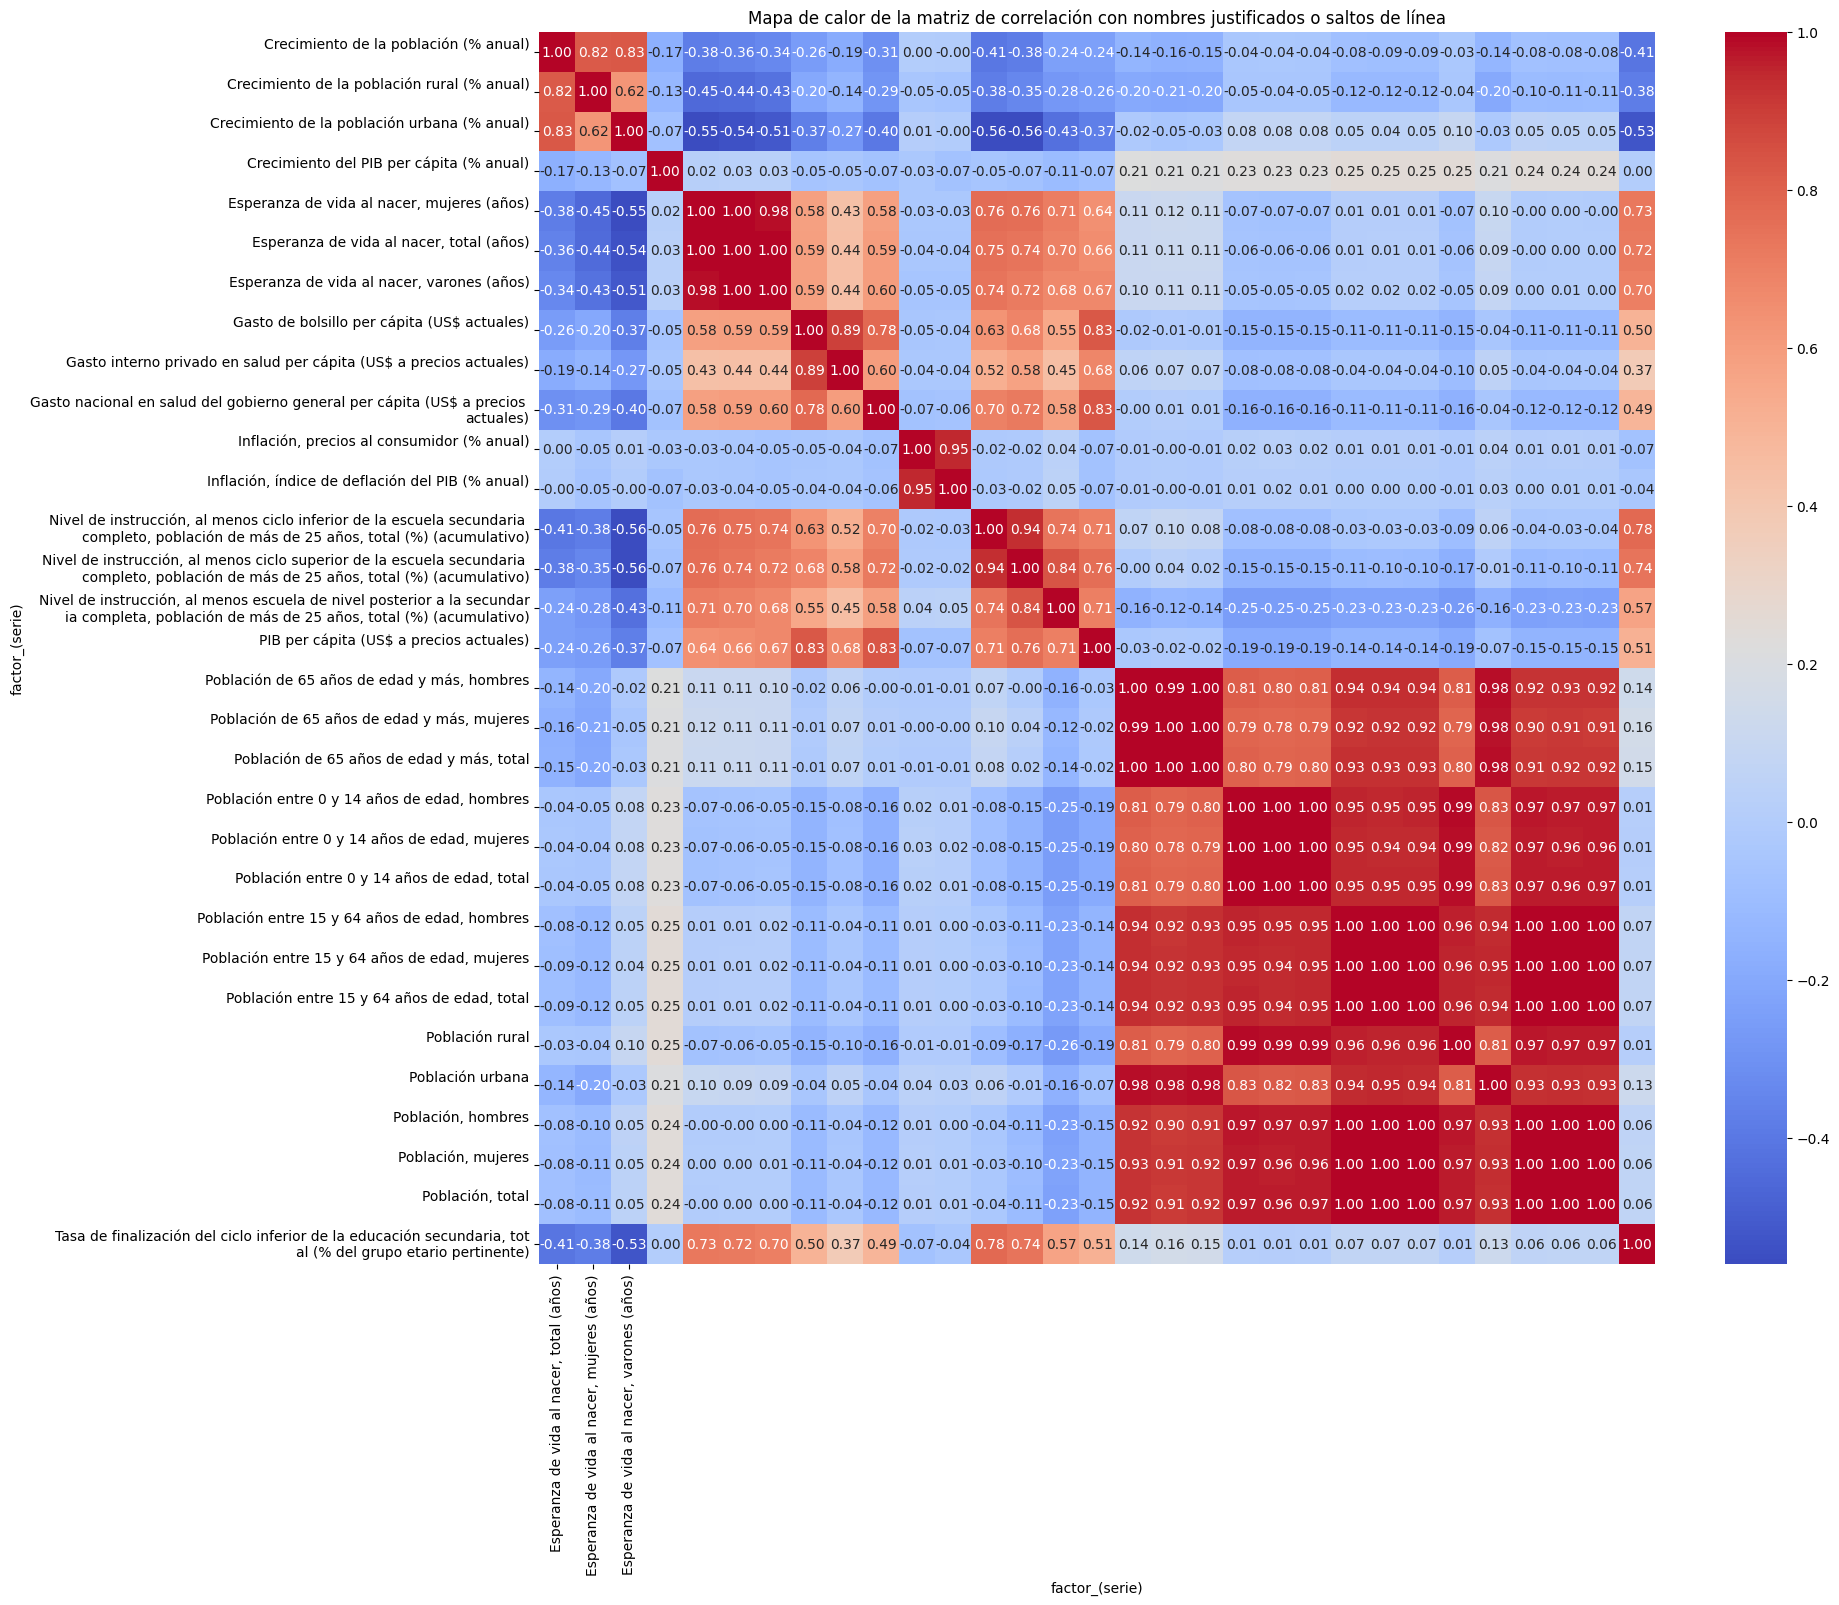

In [47]:


# Suponiendo que 'matriz_correlacion' es tu matriz de correlación

plt.figure(figsize=(18, 16))
ejex = ['Esperanza de vida al nacer, total (años)',
'Esperanza de vida al nacer, mujeres (años)',
 'Esperanza de vida al nacer, varones (años)']
# Modificar los nombres de las columnas para que tengan saltos de línea o estén justificados
# Ejemplo: insertar un salto de línea si el nombre es muy largo
nuevos_nombres_columnas = [nombre[:71] + '\n' + nombre[71:] if len(nombre) > 10 else nombre for nombre in matriz_correlacion_reorganizado.columns]

# Crear el mapa de calor con los nombres modificados
sns.heatmap(matriz_correlacion_reorganizado, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=ejex, yticklabels=nuevos_nombres_columnas)

plt.title('Mapa de calor de la matriz de correlación con nombres justificados o saltos de línea')
plt.show()
